<a href="https://colab.research.google.com/github/scottstuart11/strokes-gained/blob/master/strokes_gained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This demonstration notebook provides a suggested set of libraries that you might find useful in crafting your data stories.  You should comment out or delete libraries that you don't use in your analysis.

In [1]:
#number crunching
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Project team

Scott Stuart and Franklin Goldszer
# Background and overview

Our motivation was due to the fact that we are both golf enthusiasts and were interested in how data can show itself in the sport in a similair fashion to that which we saw with money ball.

# Approach

We will be considering the correlation between tournament money one by players and various metrics relating to their drive distance from the tee. 

# Quick summary

We saw that there was a positive correlation between average drive dstance and tournament money won and converesely a negative correlation between distance to tee after first drive and tournament money won.



# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [2]:
# Provide code for downloading or importing your data here
# Load CSV file data into a dataframe.
# We put the data on my local github for ease of upload:
dataset = pd.read_csv('https://raw.githubusercontent.com/scottstuart11/strokes-gained/master/Final_Data.csv')
dataset

,Player Name,Season,Statistic,Variable,Value
0,Ernie Els,2010,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"5,652,075"
1,Dustin Johnson,2010,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"5,280,289"
2,Matt Kuchar,2010,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"5,180,477"
3,Jim Furyk,2010,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"4,984,622"
4,Luke Donald,2010,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"4,630,734"
...,...,...,...,...,...
2826,David Duval,2013,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"$6,210"
2827,Kevin Kisner,2013,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"$6,180"
2828,Scott McCarron,2013,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"$6,060"
2829,Andrew Johnson,2013,Total Money (Official and Unofficial),Total Money (Official and Unofficial) - (MONEY),"$5,850"


# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [8]:

# Transpose the data so that the rows relating to features are their own columns (those features being Distance to hole, Averade Drive Distance, and Money) now have their own columns 
df = dataset.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()

df.rename(columns = {'Total Money (Official and Unofficial) - (MONEY)':'Money (Millions)', 'Average Distance to Hole After Tee Shot - (AVG)':'Distance to Hole (Yards)', 'Total Distance Efficiency - (AVERAGE DISTANCE (YARDS))':'Average Drive Distance (Yards)'}, inplace = True)

df.head()


Variable,Player Name,Season,Distance to Hole (Yards),Average Drive Distance (Yards),Money (Millions)
0,Aaron Baddeley,2010,166.1,300.441,"879,317"
1,Aaron Baddeley,2011,168.4,298.89,"$3,157,193"
2,Aaron Baddeley,2012,169.4,306.011,"$1,215,753"
3,Aaron Baddeley,2013,NaN,NaN,"$721,024"
4,Aaron Goldberg,2010,NaN,NaN,"10,615"


In [10]:
# Gets rid of commas and dollar signs in the money values so they can then be made into numbers 
# for graph presentation
def remove_and_convert(chars_to_remove, feature, df):
  for feat in df.columns[2:]: # for each feature
    if(feat == feature):        # if it matches with the variable feature (money)
      for char in chars_to_remove:   # for each of the characters to remove
        df[feature] = df[feature].str.replace(char, '') #replace the character with nothing
    df[feat] = df[feat].astype(float) # turn the values into floats
  return df

df = remove_and_convert(["$", ","], "Money (Millions)", df)

df.head()

Variable,Player Name,Season,Distance to Hole (Yards),Average Drive Distance (Yards),Money (Millions)
0,Aaron Baddeley,2010,166.1,300.441,879317.0
1,Aaron Baddeley,2011,168.4,298.890,3157193.0
2,Aaron Baddeley,2012,169.4,306.011,1215753.0
3,Aaron Baddeley,2013,NaN,NaN,721024.0
4,Aaron Goldberg,2010,NaN,NaN,10615.0


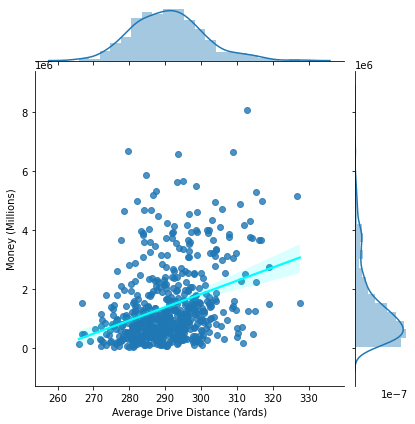

In [11]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# Each dot is a player-season, initially was using reg plot with the line below:
# sns.regplot(x="Average Drive Distance", y="Money", data=df, color = 'Green')

# But found this one on stack overflow: https://stackoverflow.com/questions/31568874/how-to-change-the-line-color-in-seaborn-linear-regression-jointplot

g = sns.jointplot(x="Average Drive Distance (Yards)", y="Money (Millions)", data=df, kind='reg',joint_kws={'line_kws':{'color':'cyan'}})
# plt.ticklabel_format(style='plain', axis='both', useOffset=False)


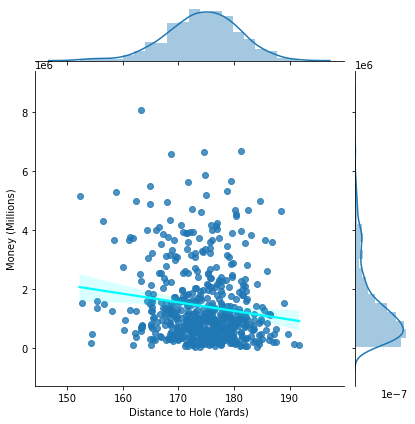

In [12]:
g = sns.jointplot(x="Distance to Hole (Yards)", y="Money (Millions)", data=df, kind='reg', joint_kws={'line_kws':{'color':'cyan'}})

In [0]:
# sns.boxplot(x="Season", y="Average Drive Distance", data=df);

# Interpretations and conclusions

According to strokes gained, distance and accuracy of the drive is the biggest predictor of success for a golfer which is what our data showed as well.

# Future directions

Could consider short game metrics such as chipping and putting and see how performance here predicts succcess in tournaments. 